In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


(-0.5, 63.5, 63.5, -0.5)

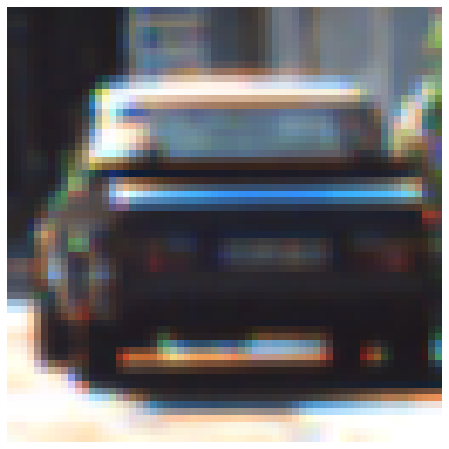

In [2]:
path = r"D:\Surya\College\SEM_6\Applied Machine Learning\Assignments\Mini Project\dataset\data\vehicles/1.png"
image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(15,8))
plt.imshow(image)
plt.axis("off")

In [3]:
print("Shape:", image.shape)
print("Pixel(0,0):", image[0][0])

Shape: (64, 64, 3)
Pixel(0,0): [34 36 42]


In [4]:
from sklearn.datasets import load_files
data = load_files("D:\Surya\College\SEM_6\Applied Machine Learning\Assignments\Mini Project\dataset\data")

In [5]:
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [6]:
for i in range(len(data["data"])):
    data["data"][i] = cv2.imdecode(np.asarray(bytearray(data["data"][i]), dtype=np.uint8), cv2.IMREAD_COLOR)

1


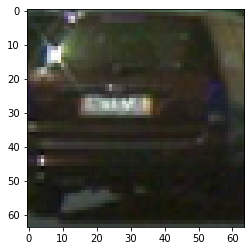

In [7]:
plt.imshow(data["data"][5])
print(data["target"][5])

1


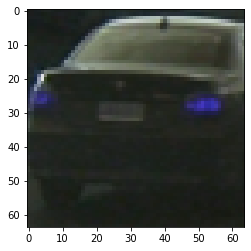

In [8]:
plt.imshow(data["data"][15000])
print(data["target"][15000])

0


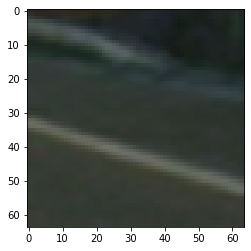

In [9]:
plt.imshow(data["data"][0])
print(data["target"][0])

In [10]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [11]:
X = data["data"]
y = data["target"]


In [12]:
n_channels = 3 #RGB
width = 64 #px
height = 64 #px

X = np.array(X).reshape(len(X),n_channels*width*height)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42, shuffle=True)

In [14]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [15]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78       889
           1       0.77      0.80      0.79       887

    accuracy                           0.78      1776
   macro avg       0.78      0.78      0.78      1776
weighted avg       0.78      0.78      0.78      1776



<AxesSubplot:ylabel='Count'>

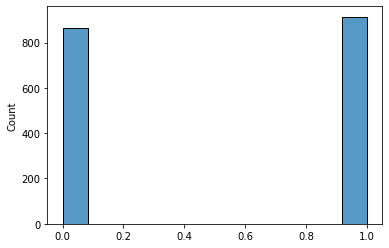

In [16]:
sns.histplot(y_pred)

In [17]:
n_predictions = 5
images_test = X_test[20:20+n_predictions].reshape(n_predictions, width, height, n_channels)

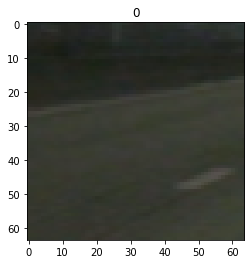

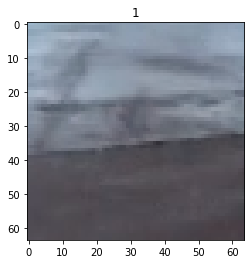

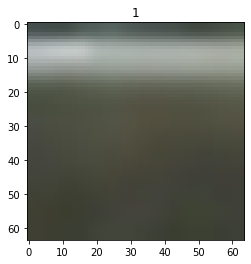

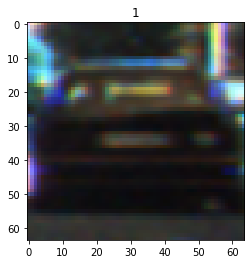

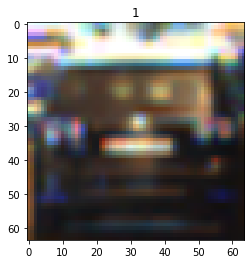

In [18]:
for i, img in enumerate(images_test):
    plt.imshow(img)
    plt.title(y_pred[20+i])
    plt.show()

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_test,y_pred)

0.7832207207207207